In [37]:
import pandas as pd
import talib.abstract as ta
import pandas_datareader as web
from technical import qtpylib

In [7]:
import yfinance as yf

In [15]:
col_rename = {
    "Date": "date",
    "Open": "open",
    "High": "high",
    "Low": "low",
    "Close": "close",
    "Adj Close": "adj_close",
    "Volume": "volume"
}

data = yf.download("TSLA").reset_index()
data.rename(columns=col_rename, inplace=True)

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: >

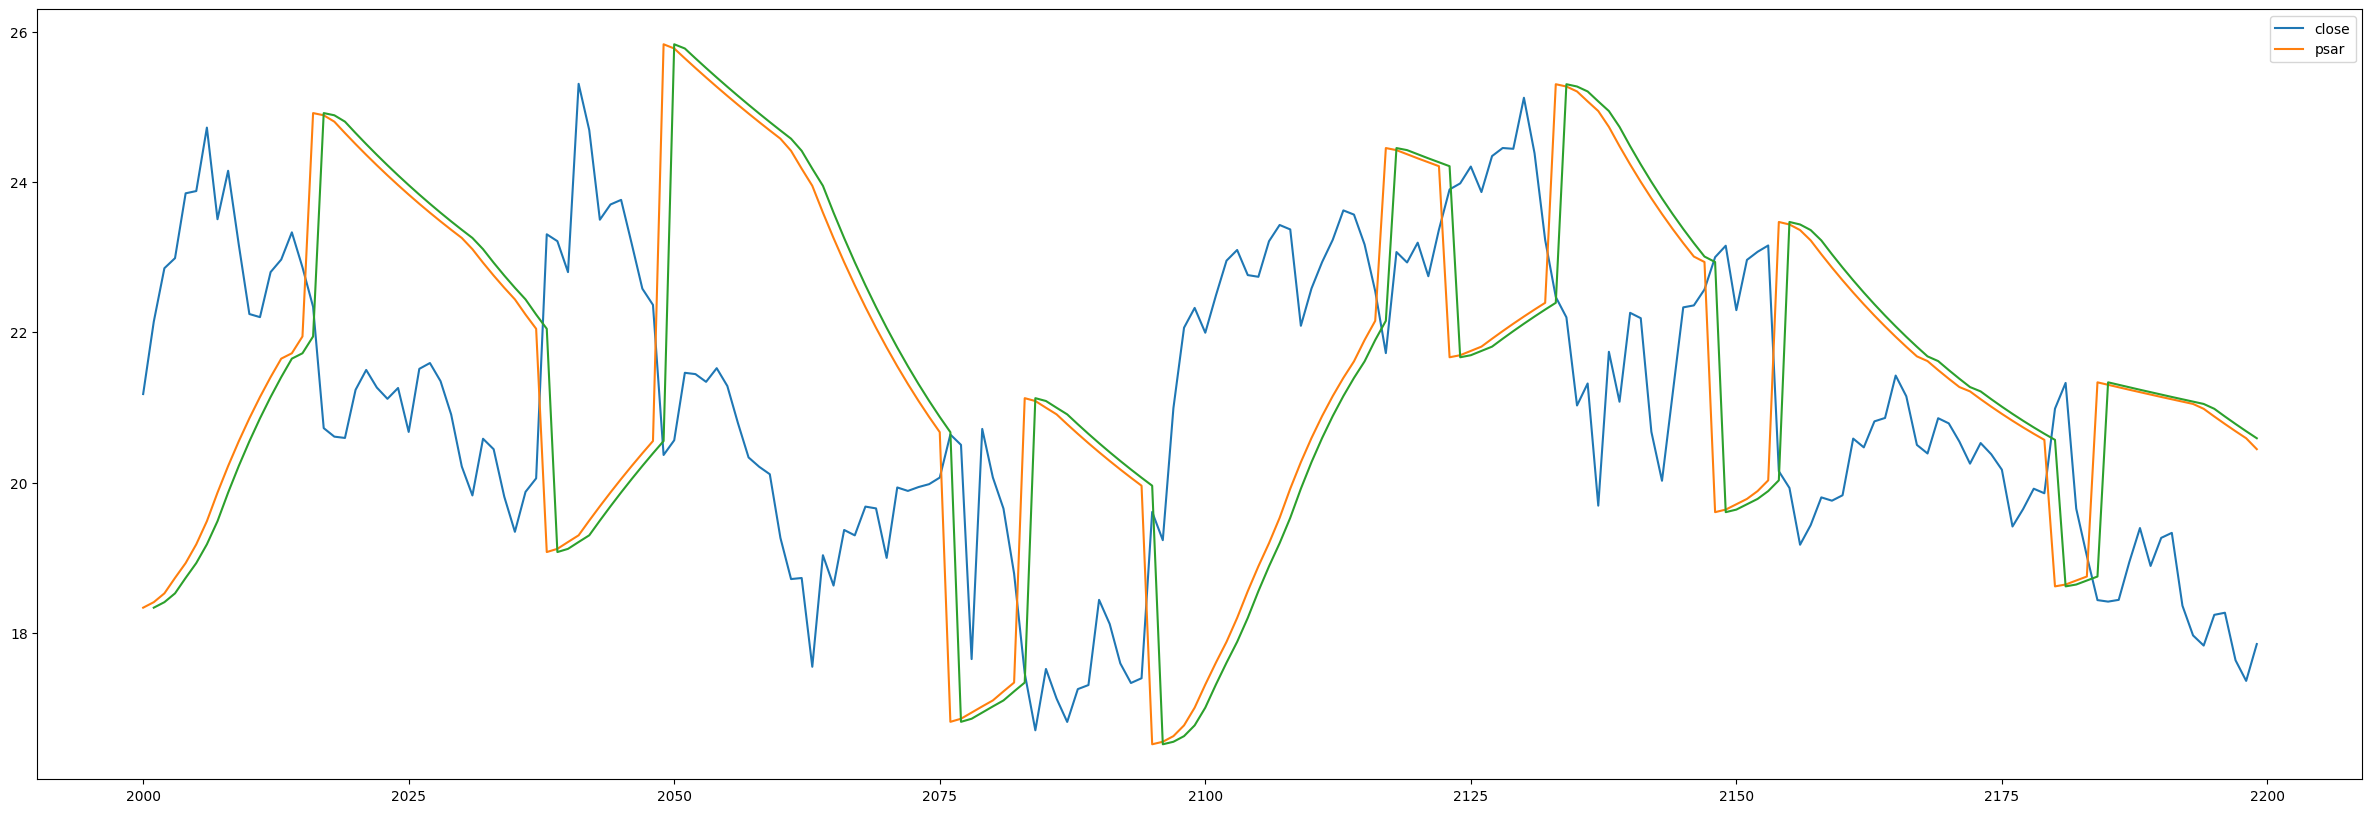

In [43]:
data["psar"] = ta.SAR(data["high"], data["low"], acceleration=0.01, maximum=0.2)
data[["close", "psar"]][2000:2200].plot(figsize=(30, 10))
data["psar"][2000:2200].shift(1).plot()

In [44]:
data["psar_buy"] = qtpylib.crossed_above(data["psar"], data["psar"].shift(1))
data["psar_sell"] = qtpylib.crossed_below(data["psar"], data["psar"].shift(1))

In [36]:
data["psar"] > data["psar"].shift(1)

0       False
1       False
2        True
3        True
4        True
        ...  
3216     True
3217     True
3218     True
3219     True
3220     True
Name: psar, Length: 3221, dtype: bool

In [10]:
data["APO"] = ta.APO(data["Close"], fastperiod=12, slowperiod=26, matype=0)

<AxesSubplot: >

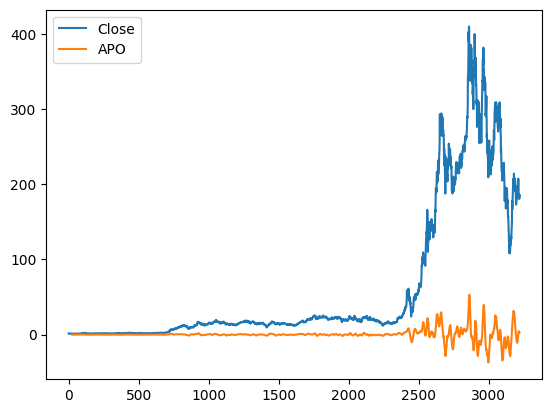

In [11]:
data[["Close", "APO"]].plot()

In [17]:
macd, macdsignal, macdhist = ta.MACD(data["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

In [20]:
data["macd"] = macd
data["macdsignal"] = macdsignal
data["macdhist"] = macdhist

<AxesSubplot: >

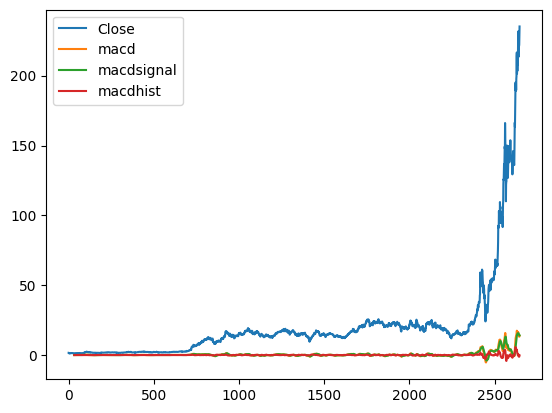

In [23]:
data[["Close", "macd", "macdsignal", "macdhist"]].plot()

In [55]:
data["PPO"] = ta.PPO(data["close"], fastperiod=12, slowperiod=26, matype=0)

<AxesSubplot: >

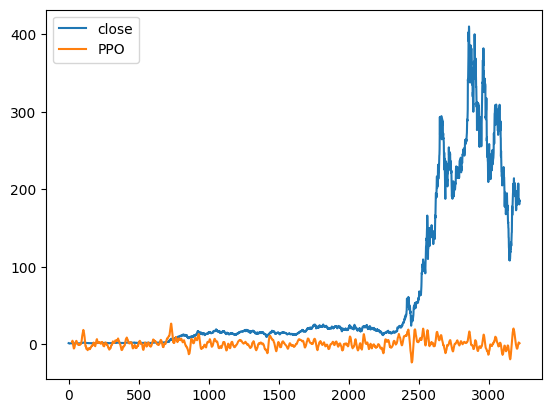

In [56]:
data[["close", "PPO"]].plot()

In [59]:
(-1 + data["PPO"]).cumprod()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3216    inf
3217    inf
3218    inf
3219    inf
3220    inf
Name: PPO, Length: 3221, dtype: float64

In [60]:
data["PPO"]-1

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3216    1.136667
3217    1.125793
3218    0.964639
3219    0.739076
3220    0.489565
Name: PPO, Length: 3221, dtype: float64